In [1]:
%matplotlib inline
import morphs
import numpy as np
import matplotlib.pyplot as plt

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
accuracies, cluster_accuracies = morphs.load.cluster_accuracies()
good_recs = morphs.data.accuracies.good_recs(cluster_accuracies)

In [3]:
all_accuracies = np.concatenate([cluster_accuracies[block_path]['accuracy'].values for block_path in cluster_accuracies])

In [4]:
all_accuracies.sort()

In [5]:
CUTOFF = 0.6

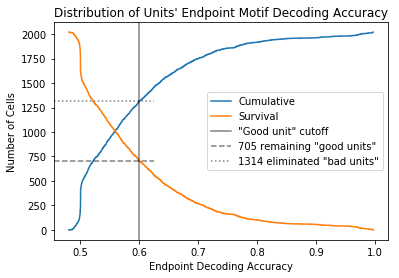

In [6]:
plt.step(np.concatenate([all_accuracies, all_accuracies[[-1]]]),
         np.arange(all_accuracies.size+1), label='Cumulative')
plt.step(np.concatenate([all_accuracies[::-1], all_accuracies[[0]]]),
         np.arange(all_accuracies.size+1), label='Survival')
plt.axvline(CUTOFF, color='k', alpha=.5, label='"Good unit" cutoff')
survived, eliminated = np.sum(all_accuracies >= CUTOFF), np.sum(all_accuracies < CUTOFF)
plt.axhline(survived, color='k', alpha=.5, linestyle='--', xmax=.3, label='{} remaining "good units"'.format(survived))
plt.axhline(eliminated, color='k', alpha=.5, linestyle=':', xmax=.3, label='{} eliminated "bad units"'.format(eliminated))
plt.legend()
plt.ylabel('Number of Cells')
plt.xlabel('Endpoint Decoding Accuracy')
plt.title("Distribution of Units' Endpoint Motif Decoding Accuracy");